# Unsupervised Learning

1. Launch a targeted marketing Ad campaign that is tailored to specific group of customers.

2. The customers are to be divided into atleast 3 distint groups.
3. This process is known as "marketing segmentation" and it is crucial for maximizing marketing campaign conversion rate.

1. Importing all the necessary libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai' , context = 'notebook', ticks = True, grid = False)

In [26]:
creditcard_df = pd.read_csv("/CC GENERAL.csv")

2. Viewing all the data in the database using pandas

In [27]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


3. info method gives the columns name

In [28]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Task1: Calculate minimum, Maximum, Average of Balance

In [29]:
print(creditcard_df["BALANCE"].min())
print(creditcard_df["BALANCE"].max())
print(creditcard_df["BALANCE"].mean())

0.0
19043.13856
1564.4748276781038


4. Summary of data features using describe method

In [30]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Task 2: 

*   Obtain the feature of the customer who made maximum ONEOFF_PURCHASES
*   Obtain the feature of Customer who made the maximum Cash Purchased Transaction?
 How many cash advance did he make.?
 How often did he paid his bill(frequency cash advnace)



In [31]:
print(creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == creditcard_df['ONEOFF_PURCHASES'].max()])

    CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
550  C10574  11547.52001  ...              0.25      12

[1 rows x 18 columns]


In [32]:
print(creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()])

     CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
2159  C12226  10905.05381  ...               0.0      12

[1 rows x 18 columns]


5. DATA VISUALISATION

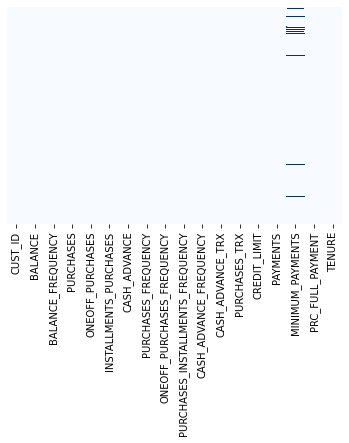

In [33]:
sns.heatmap(creditcard_df.isnull(), yticklabels= False,cbar= False ,cmap = "Blues")

6. To count number of missing values

In [34]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

7. To fill up the missing values with mean value of the colmn MINIMUM_PAYEMENTS

In [35]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [36]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Task 3: Fill the missing colums in CREDIT_LIMIT column

In [37]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [38]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

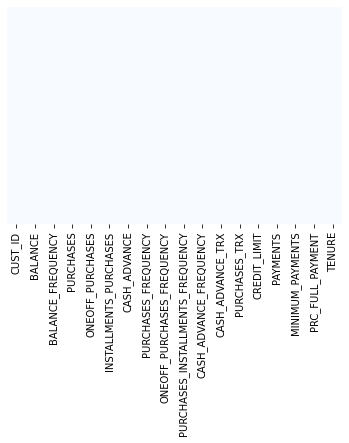

In [39]:
sns.heatmap(creditcard_df.isnull(), yticklabels= False,cbar= False ,cmap = "Blues")

8. To find out if there are any duplicate entries in dataset

0 shows there are no data duplicacy

In [40]:
creditcard_df.duplicated().sum()

0

### Task 4: Remove column CUST_ID from dataset

In [41]:
creditcard_df.drop('CUST_ID',axis = 1,inplace = True)

9. To see the coulumns and number of columns

In [42]:
n = len(creditcard_df.columns)
n
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Visualisation

Notes


1.   distplot combines matplotlib.hist function with seaborn kdeplot 
2.   kdeplot represents Kernal Density Estimate
    It is usedfor visualising Probability Density  of a continous variable.
    KDE demostrates the probability density at different values in a continuous variable.







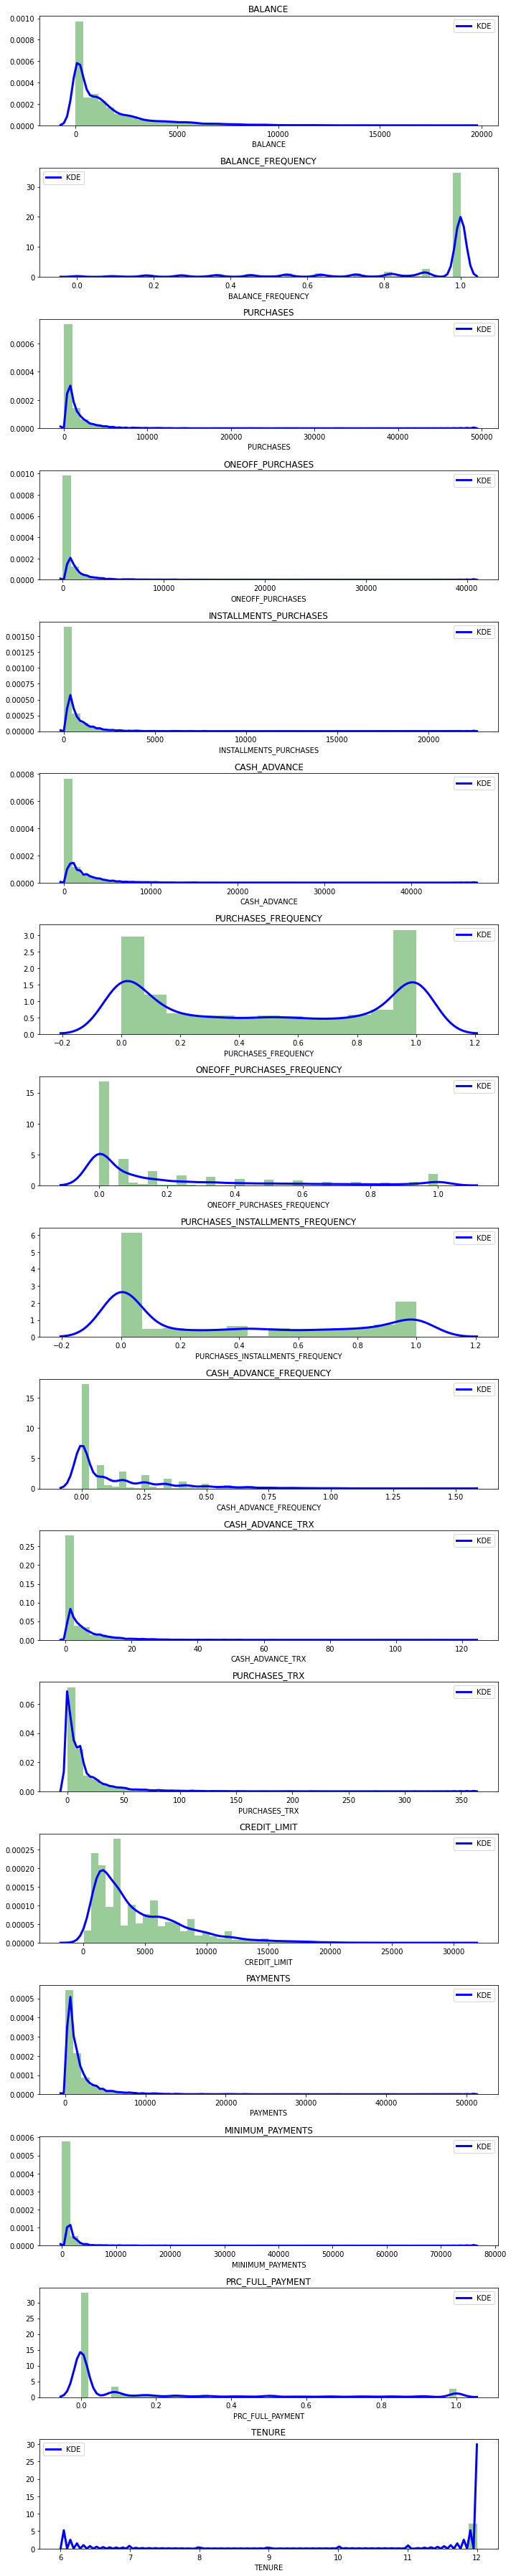

In [43]:
plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color":'b', "lw":3, "label":"KDE"},hist_kws = {"color":'g'})
  plt.title(creditcard_df.columns[i])
plt.tight_layout()

Facts for above graph:
1. Mean Balance of the first graph is calculated as $1500
2. Balance Frequency - Most cutomers update their balance frequently.
3. Purchase_Frequency - There are two types of customers..0/1
4. PRC_FULL_PAYEMENT - Most of the customers don't psy their balance in full.
5. Tenure - Most of the customers are 11 or more years old.

### Task5: Plot the correlation matrix between the features
To find the corelation between 2 or more columns.

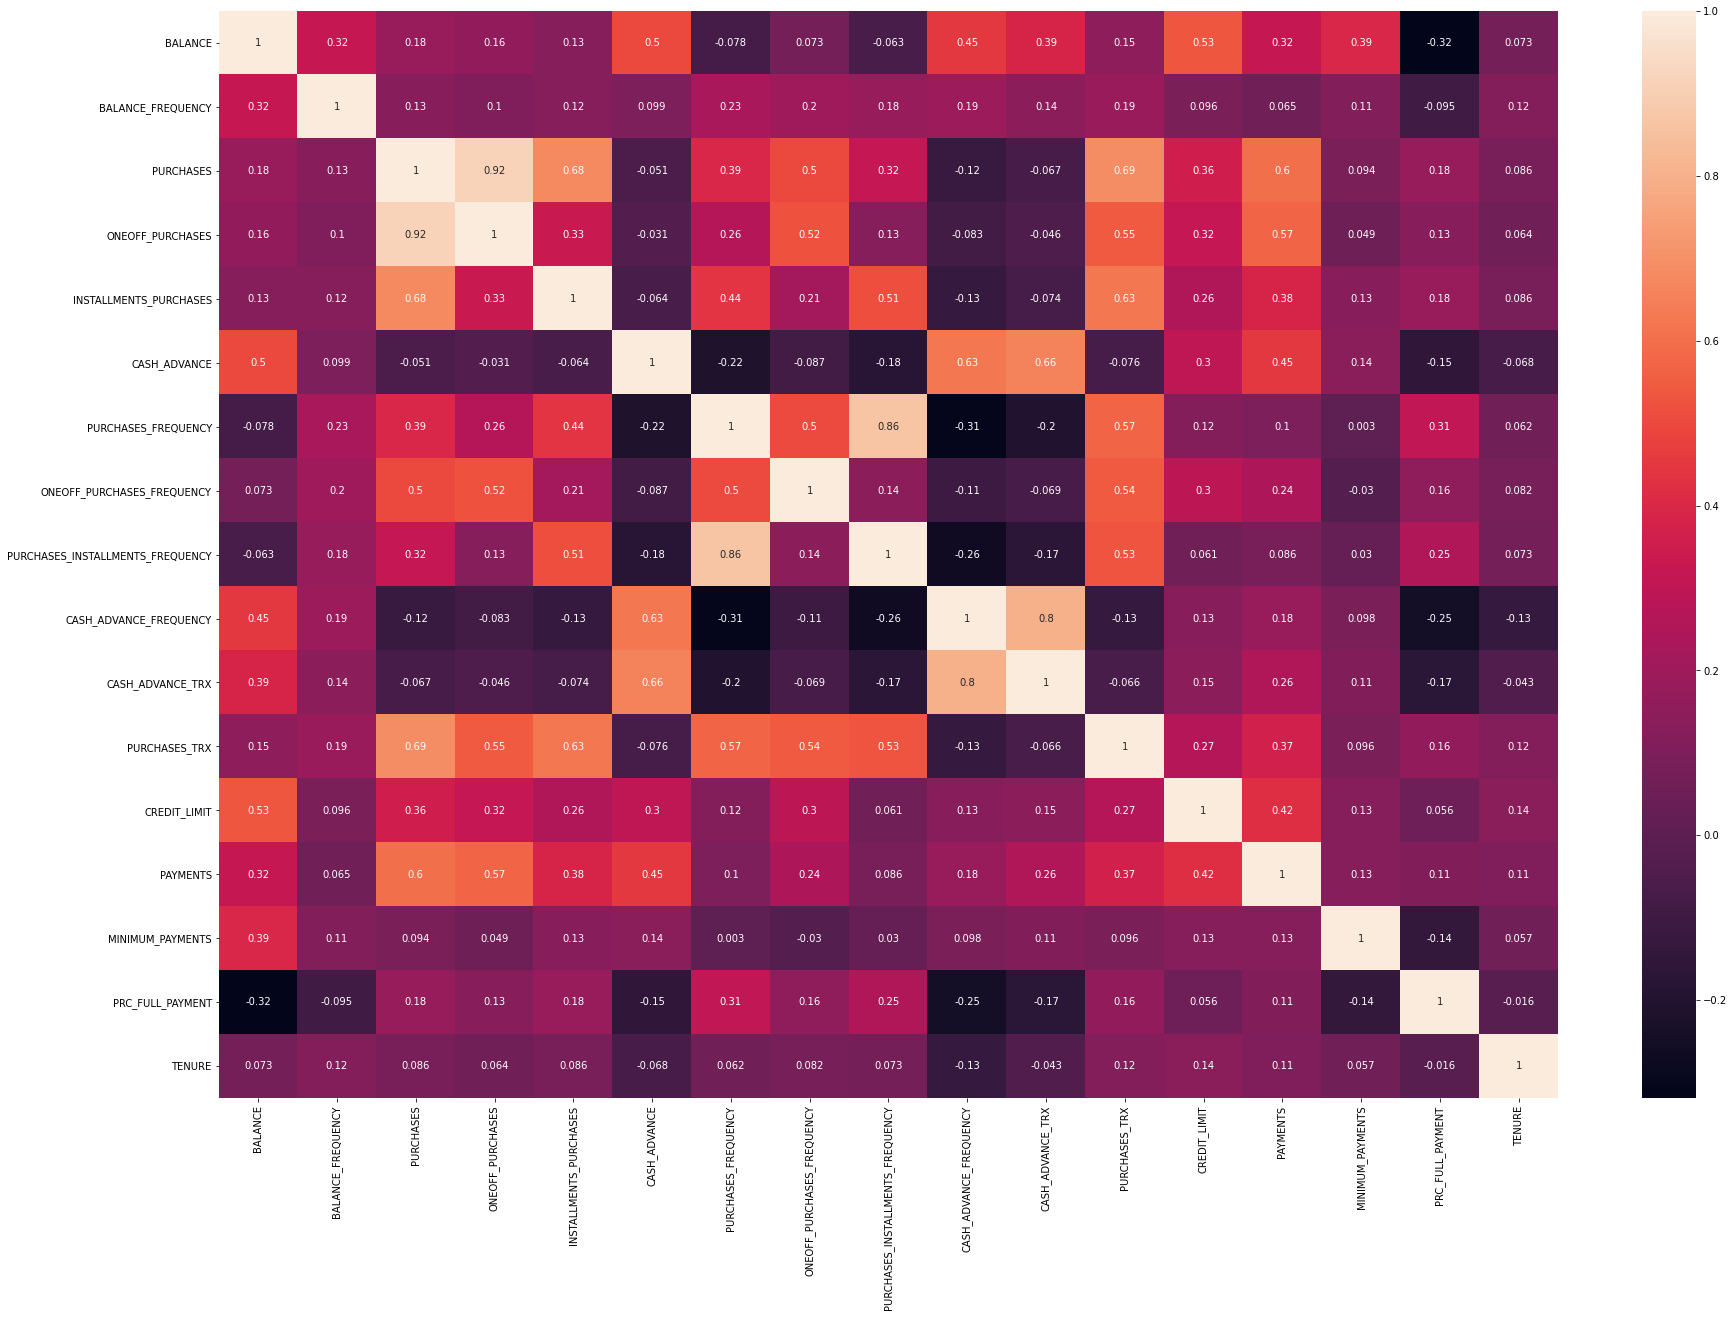

In [48]:
correlations = creditcard_df.corr()
f,ax = plt.subplots(figsize = (30,20))
sns.heatmap(correlations, annot = True)

# K Means



*   K means is an unsupervised learning algorithm.
*   It means grouping data points (clustering data) without any prior boundations or category.
*   The algorithm groups observation with similar attributes together by measuring the Euclidian distance between points.









K-Mean Algorithm:
1. Select number of clusters k.
2. Select random k points that will be centroid of the cluster.
3. Assign the new data point nearest to the centroid of the clusters. 
4. Calculate the new clusters centroid with the new data point 
5. Reassign the centroids for each cluster
6. Go to step 3 and repeat

Notes:
1. The number of iterations selected are always completed.
2. The loop breaks if the centroid do not change its position.
3. The loop doesnt break by changing k because we dont change k in between the algorithm or when loop is being executed.

 Transforming Data:
 def fit_transform(self, X, y=None, **fit_params):
        
        Fit to data, then transform it.
        Fits transformer to X and y with optional parameters fit_params
        and returns a transformed version of X.
        
        Parameters:
        
        X : {array-like, sparse matrix, dataframe} of shape \
                (n_samples, n_features)
        y : ndarray of shape (n_samples,), default=None
            Target values.
        **fit_params : dict
            Additional fit parameters.
        Returns
        
        X_new : ndarray array of shape (n_samples, n_features_new)
            Transformed array.
        
non-optimized default implementation;
override when a better method is possible for a given clustering algorithm

In [57]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [60]:
creditcard_df.shape

(8950, 17)

In [59]:
creditcard_df_scaled.shape

(8950, 17)

In [61]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [62]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Elbow Method

Obtaining optimum number of clusters(k) using  Within Cluster Sum of Square(WCSS) - 

WCSS = sumof distance(Pi,Ci)^2
  a. Assume k =1 , WCSS will be very large
  b. Assume k =2, WCSS will be smaller than 1
  c. Calculate WCSS for many points and then plot a graph with WCSS on y axis and K on x-axis.
  The graph will give the optimum value of k at elbow point after which the slope will be less.
  It is called Elbow method because graph shapes as an elbow.


Inertia_ : sum of squared distance of samples to their closest cluster center.

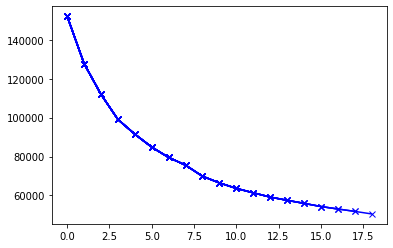

In [66]:
value_1 = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i) 
  kmeans.fit(creditcard_df_scaled)
  value_1.append(kmeans.inertia_) 
  plt.plot(value_1,'bx-')

x axis = WCSS

---


y axis = value of k from 1 to 20


---


Observation:The slope is gradually changing after points 7.5.
So we could take k as 7 or 8 or 9 maybe.

### Task 6: Obtain the value of k for 7 columsn only.

In [70]:
creditcard_df_scaled[:,:7].shape

(8950, 7)

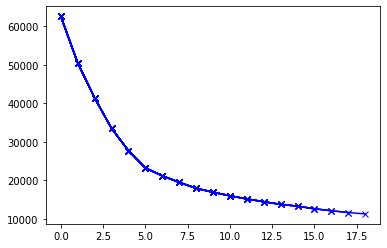

In [69]:
value_1 = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i) 
  kmeans.fit(creditcard_df_scaled[:,:7])
  value_1.append(kmeans.inertia_) 
  plt.plot(value_1,'bx-')

The k value can be 5 for the 7 columns.

Applying K-Means algorithm:

In [71]:
kmeans = KMeans(7)
#k = 7
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [72]:
kmeans.cluster_centers_.shape
#Gives centroid for all different clusters

(7, 17)

In [73]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers
#this gives the centroid for all the different columns for 7 groups

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.126801,0.429730,0.939029,0.895888,0.574411,-0.309125,1.092770,1.872513,0.534806,-0.410394,-0.320751,1.196848,0.701672,0.385048,-0.057462,0.456446,0.307642
1,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.172121,-0.201648,-0.257506,0.295702,0.201907
2,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
3,1.666473,0.392099,-0.205327,-0.149913,-0.210162,1.990753,-0.456789,-0.190269,-0.404044,1.908547,1.922104,-0.241414,1.007587,0.834821,0.552973,-0.391161,0.069807
4,0.007572,0.402578,-0.343831,-0.225095,-0.399336,-0.104339,-0.810055,-0.336035,-0.752333,0.084585,-0.041876,-0.464562,-0.301248,-0.248932,-0.015896,-0.452870,0.271810
5,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278236,-0.221810,-0.015735,0.307237,0.252156
6,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613


Scaling data back to original values as calculation is done on transformed values.

In [74]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers
#This table is showing the centroids of each of the 7 groups and its all features as the original value.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1828.399674,0.979070,3009.455142,2079.427650,930.500678,330.620880,0.928932,0.761065,0.576983,0.053020,1.059937,44.458991,7047.418985,2847.821449,730.293998,0.287217,11.929022
1,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
2,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
3,5033.096672,0.970155,564.520447,343.613277,221.020895,5153.573564,0.307019,0.145697,0.203860,0.517064,16.365772,8.709172,8160.463697,4149.870001,2152.885952,0.039307,11.610738
4,1580.235683,0.972638,268.605454,218.826105,49.953480,760.066553,0.165236,0.102212,0.065441,0.152070,2.963054,3.162562,3398.387286,1012.510210,827.161759,0.021258,11.881070
5,799.439665,0.955578,918.085545,202.468866,716.053491,206.951098,0.883916,0.095855,0.830697,0.039554,0.775550,19.032274,3482.112568,1091.026929,827.537625,0.243576,11.854768
6,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


Classifications Result:
1. First Customers Cluster(Transactor)(1): 
  *   Paid least amount of interest charges
  *   Careful with their money
  *   Lowest Balance(103)
  *   Cash Advance(301)
  *   Percent of full payement = 24%

2. Second Customers Cluster(Revolvers)(3):
  *   se credit card as loan
  *   Most Lucrative sector
  *   Highest Balance(5033)
  *   Highest Cash Advance(5153)
  *   Low purchase frequency
  *   High cash advanace frequency(51)
  *   High advance cash transactions(16)


3.  Third Cluster(VIP/Prime)(6):
  *   High credit limit(12000)
  *   High percentage of full payment(39%)

4. Fourth Customers Cluster(Low Tenure)(2):
  *   Low Tenure(7)
  *   Low Balance(866)
  

In [78]:
labels.shape
#Labels associated with each data point


(8950,)

In [77]:
labels.max()

6

In [79]:
labels.min()

0

Now, when we have made the clusters, lets categorize each custmers into these clusters.
y_kmeans will have the value of the predicted cluster for each customer.

In [80]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 2, 3, ..., 0, 1, 3], dtype=int32)

In [81]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({"Cluster":labels})],axis = 1)
creditcard_df_cluster
#The last column is giving the predicted value of customer cluster.
#Or gives the cluster to which it belongs.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


# Plotting histogram for various clusters.

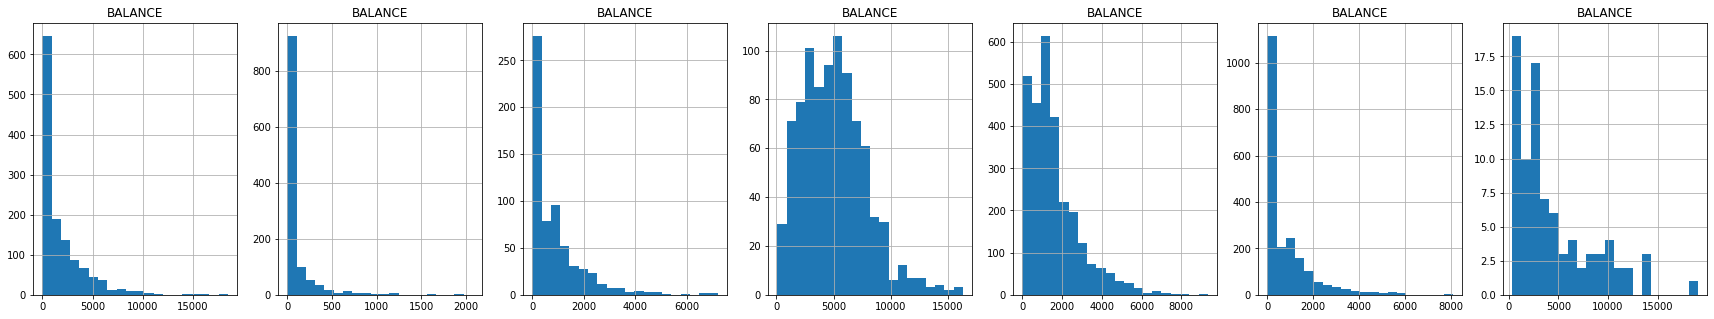

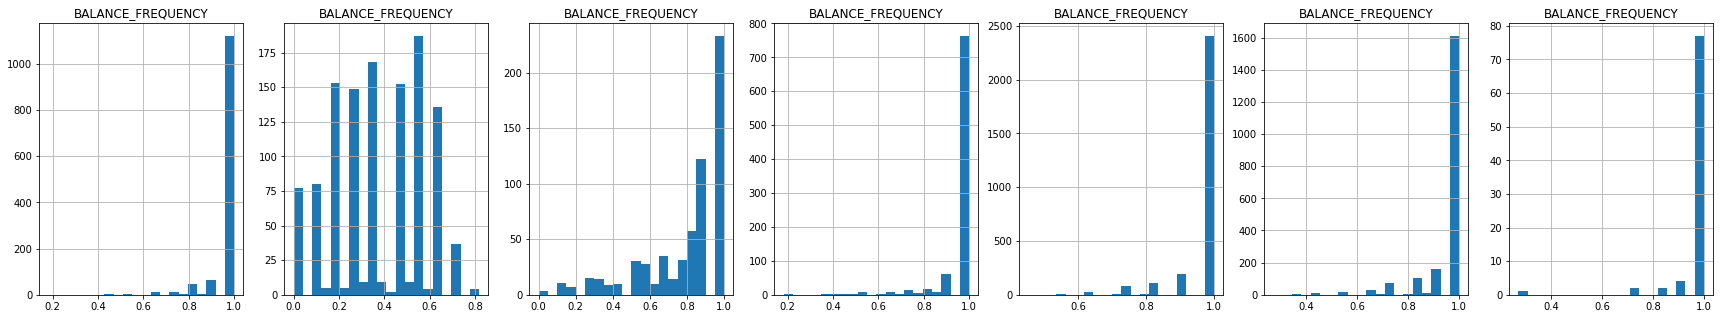

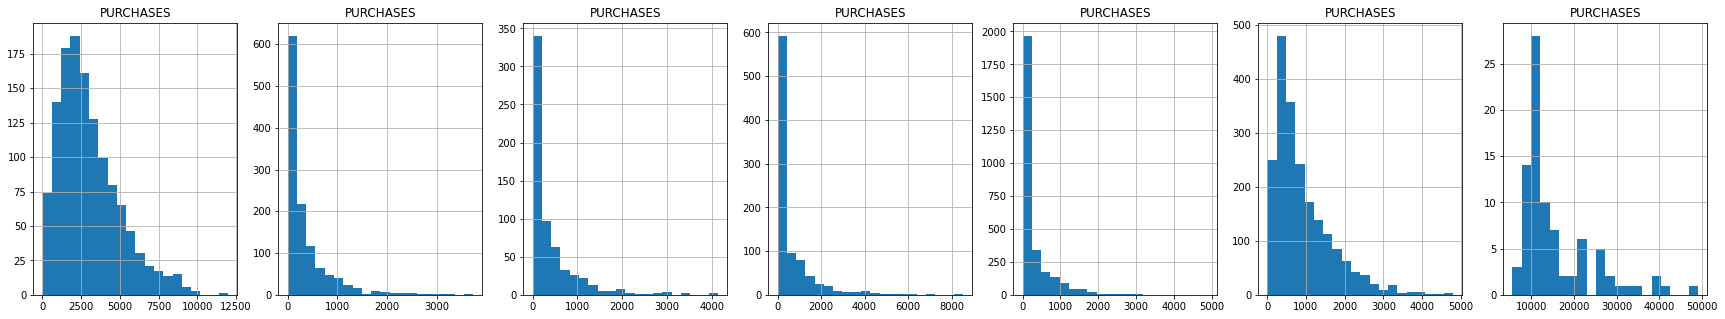

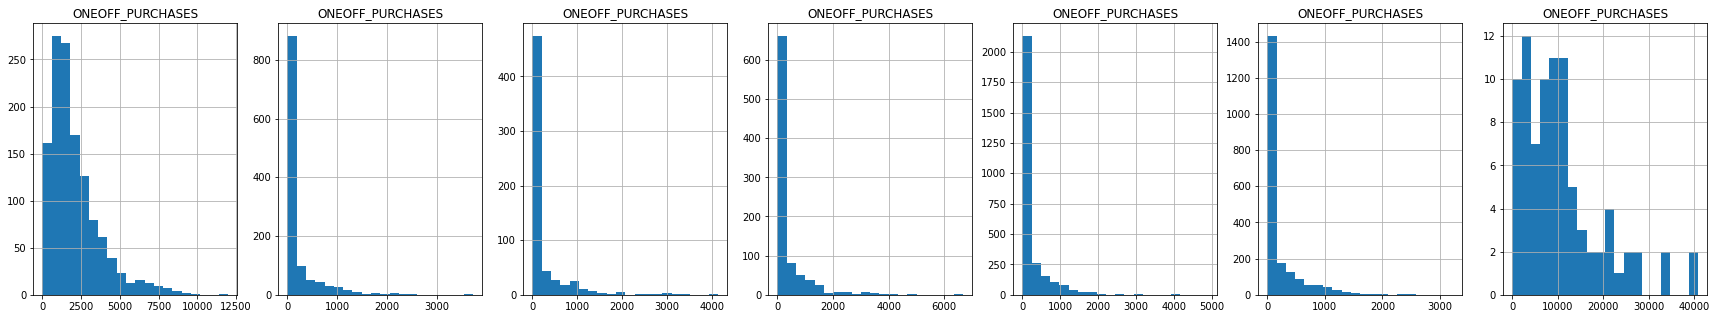

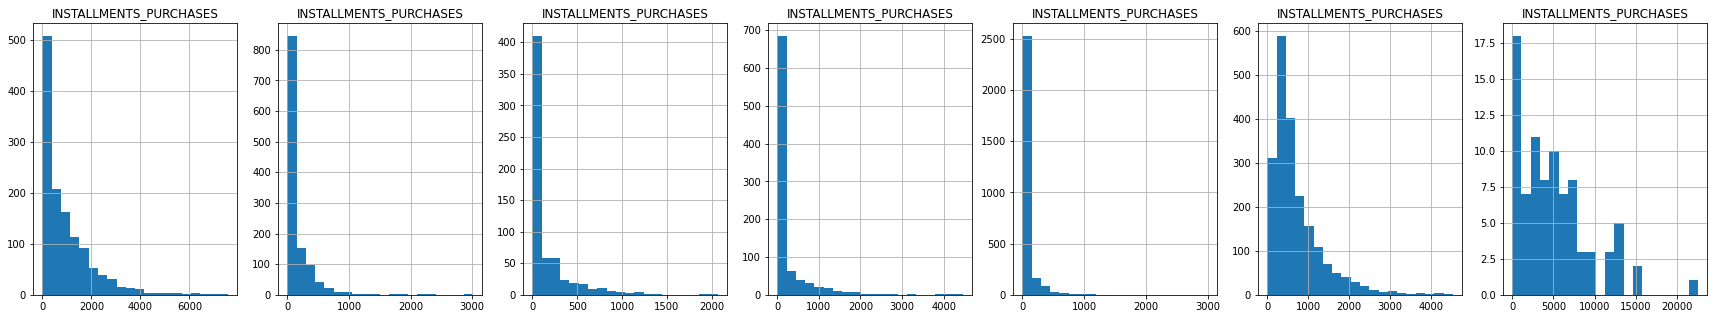

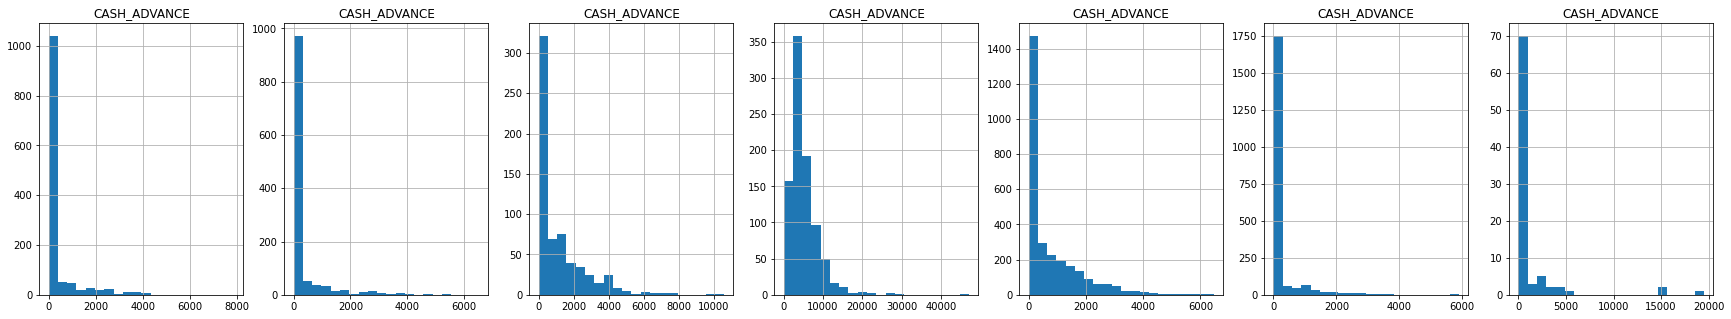

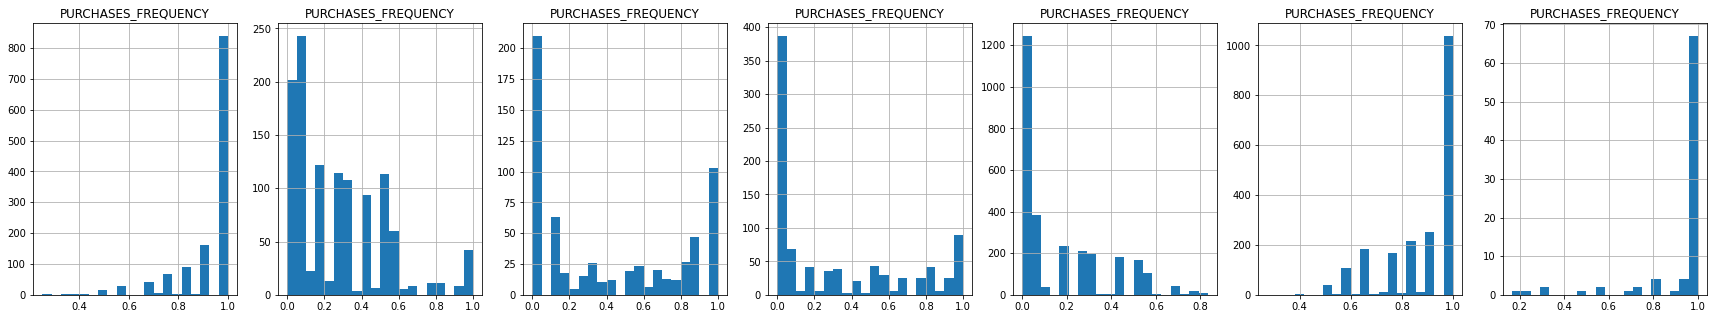

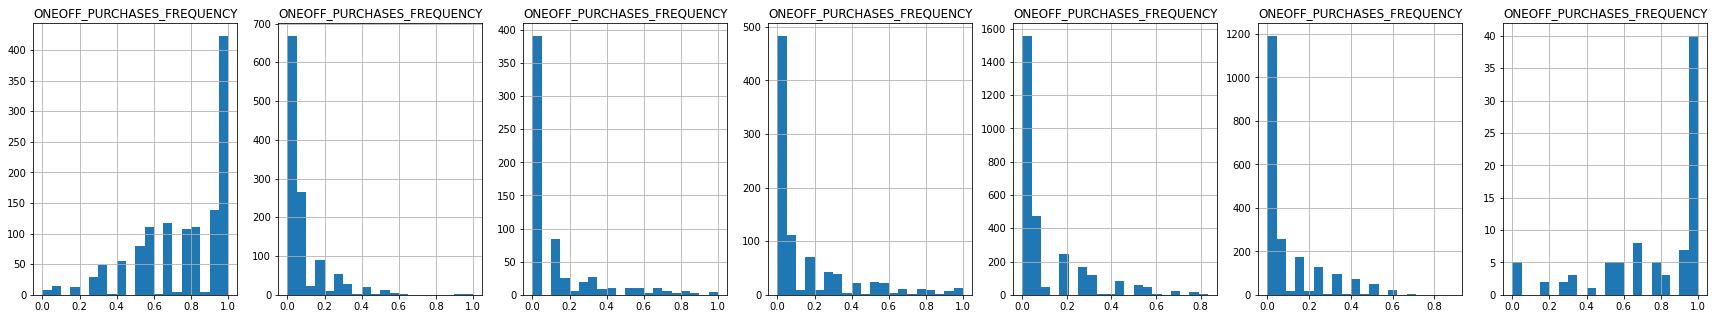

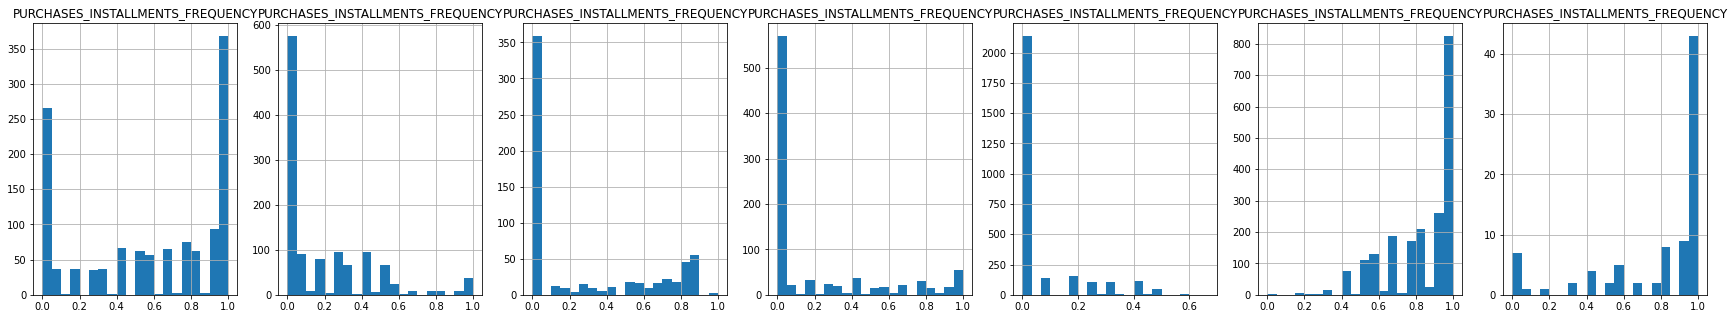

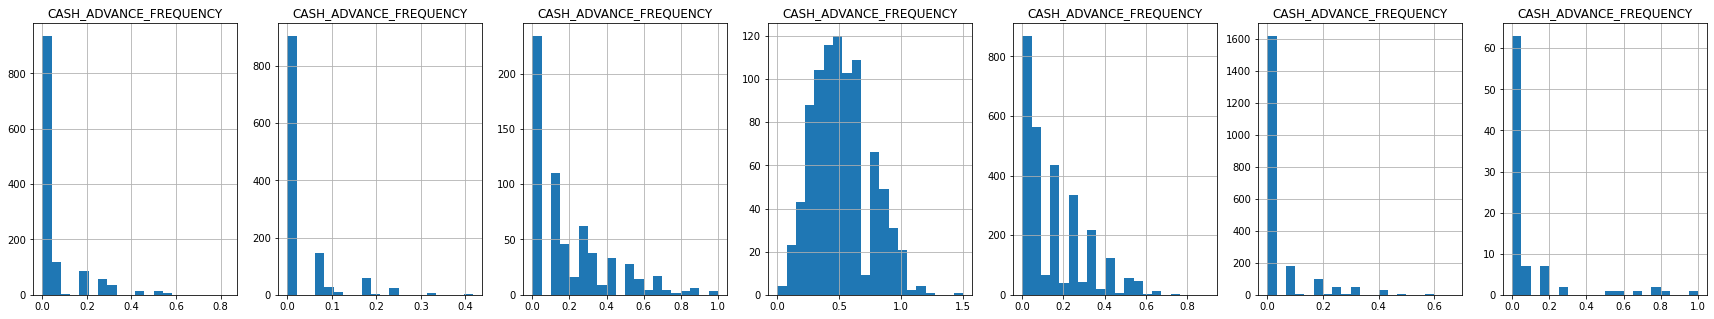

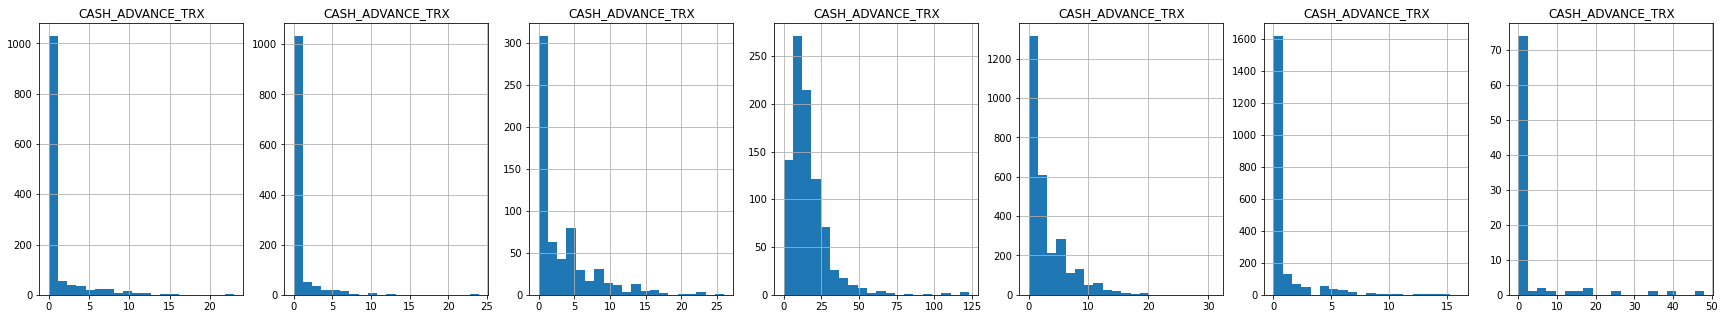

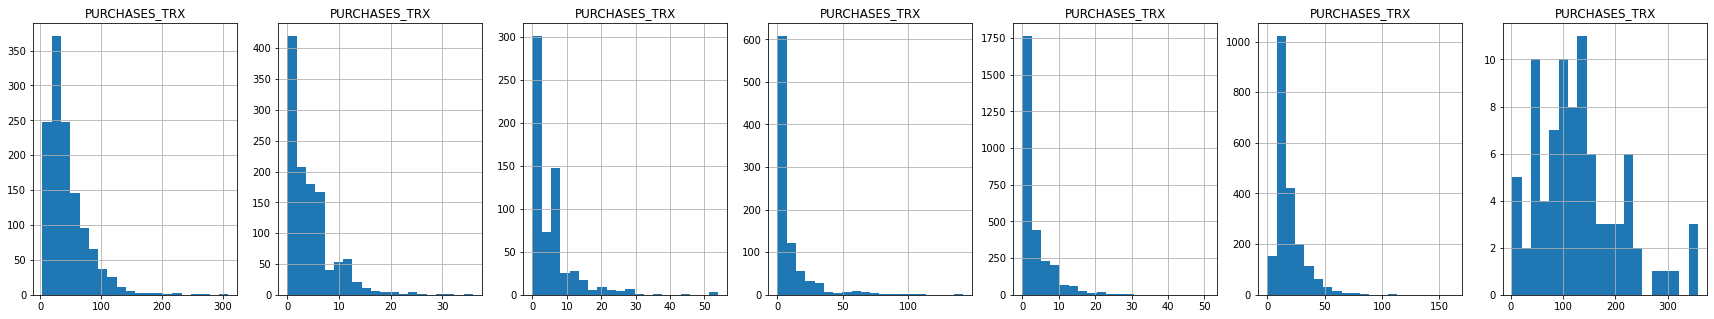

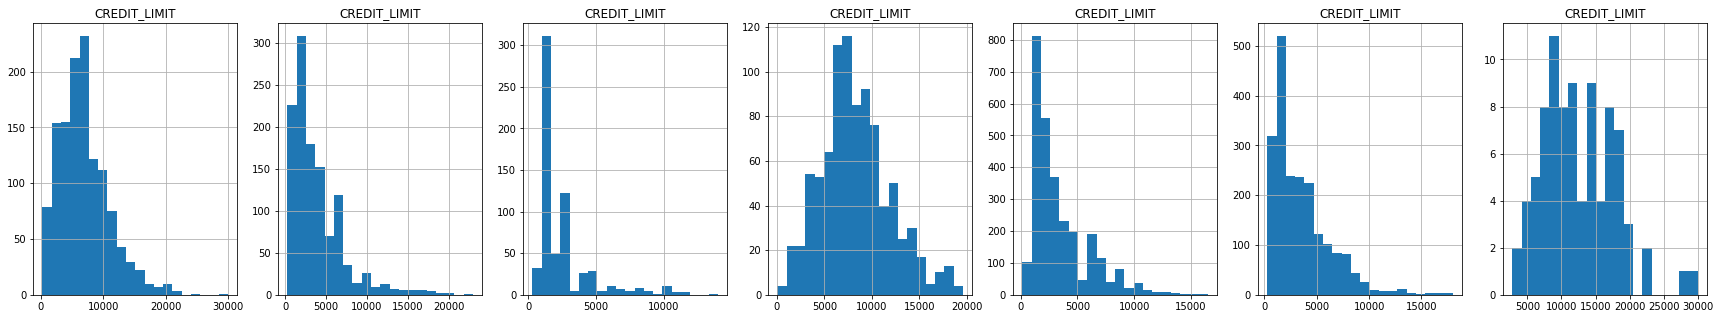

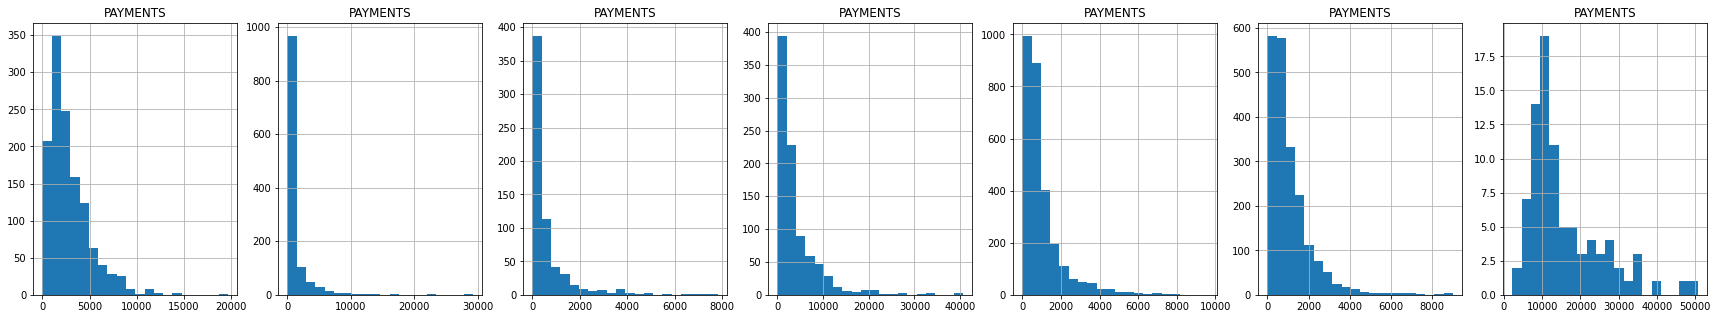

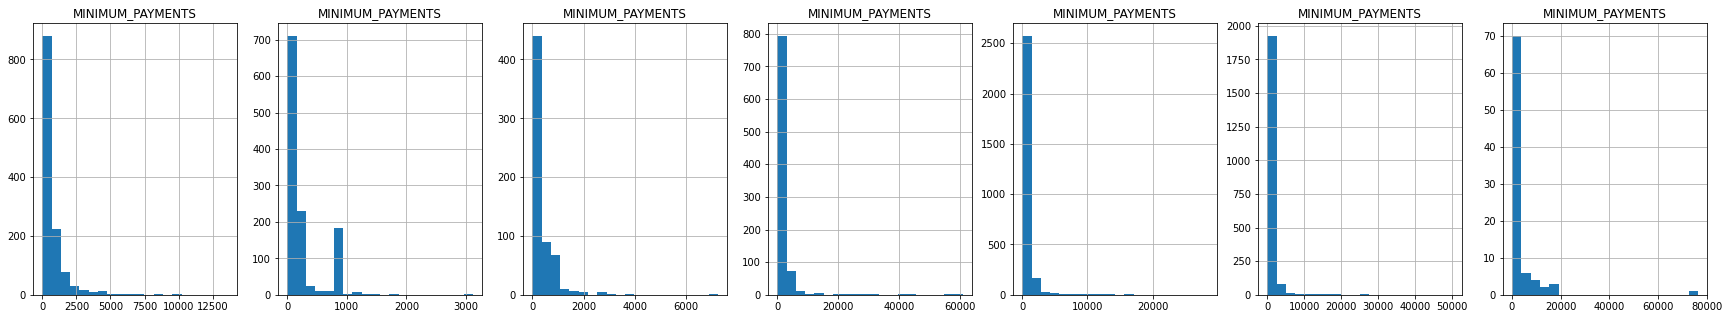

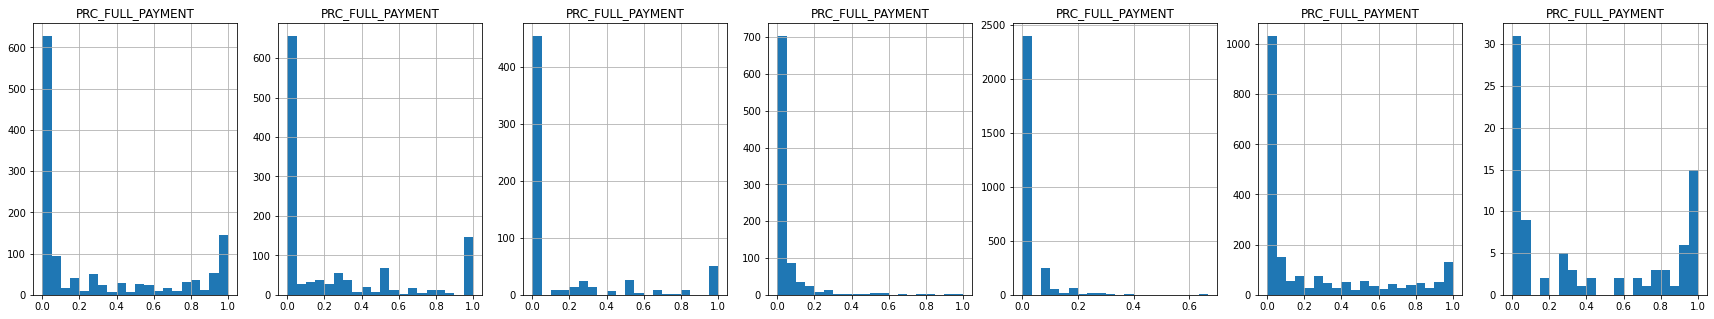

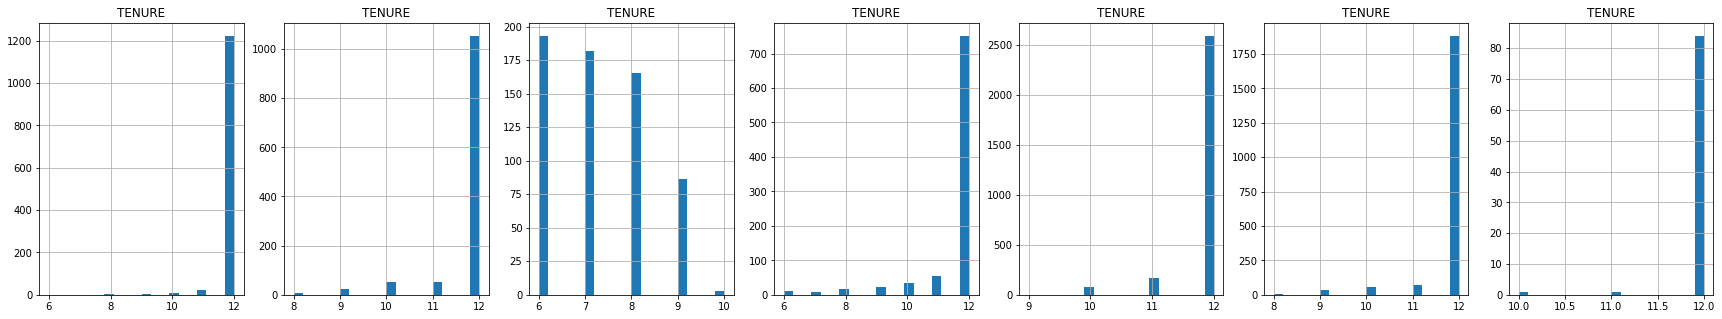

In [88]:
for i in creditcard_df.columns:
  #To select all the columns of the data frame
  plt.figure(figsize = (30,5))
  #The next loop is to show plot for each 7 clusters
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(i)
plt.show()

# Principal Component Analysis



1.   PCA is an unsupervised learning algorithm
2.   It performs dimensionality reduction while keeping the original information unchanged.
3.   PCA finds a new set of features called Components.
4.   Components are composites of uncorrelated given input features





In [90]:
#Obtain principal components on our dataset:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222079, -1.07645127],
       [-1.13830298,  2.50647177],
       [ 0.96968514, -0.38351973],
       ...,
       [-0.92620039, -1.81078409],
       [-2.33654928, -0.65796472],
       [-0.55642216, -0.40046628]])

In [91]:
#Dataframe with 2 components:
pca_df = pd.DataFrame(data = principal_comp,columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138303,2.506472
2,0.969685,-0.383520
3,-0.873630,0.043164
4,-1.599433,-0.688580


In [92]:
#Concatenation Cluster label to the Dataframe:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)
pca_df.head()

,pca1,pca2,Cluster
0,-1.682221,-1.076451,4
1,-1.138303,2.506472,3
2,0.969685,-0.383520,0
3,-0.873630,0.043164,4
4,-1.599433,-0.688580,4


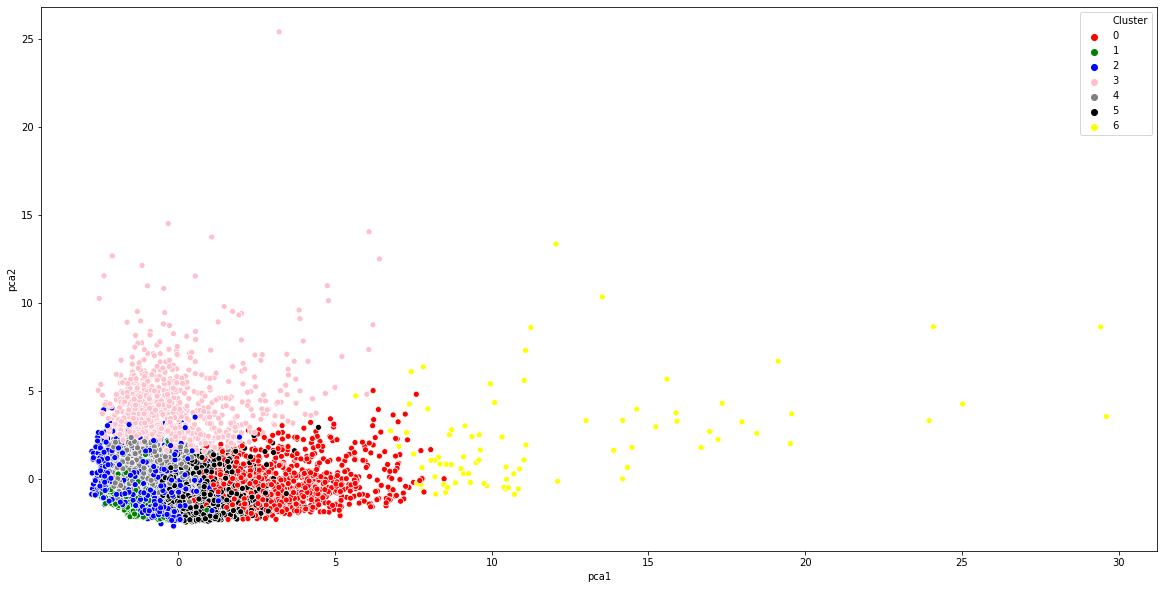

In [97]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster', data = pca_df,palette = ['red','green','blue','pink','grey','black','yellow'])
plt.show()

Our customers in specific clusters can be visualised by following colors.


*   Transacter - Green
*   Revolver - Pink
*   Vip - Yellow
*   Low Tenure  - Blue




